### Описание проекта: 
Нам необходимо провести анализ оттока клиентов.  
Анализ покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка. Проанализируем клиентов регионального банка и сегментируем пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.   
Основыне шаги: Знакомство с данными и предобработка >> Исследовательский анализ данных >> Сегментация пользователей на основе данных о количестве потребляемых продуктов >> Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

### **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## 1. Знакомство с данными

### 1.1 Импорт нужных библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/Users/nonadoinjashvili/Desktop/final_project/bank_scrooge.csv')
except:
    df = pd.read_csv('https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F')

### 1.2 Вывод данных и информации о них

In [3]:
df.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [4]:
df.info

<bound method DataFrame.info of       USERID  score       city gender  age  equity     balance  products  \
0     183012  850.0    Рыбинск      Ж   25       1    59214.82         2   
1     146556  861.0    Рыбинск      Ж   37       5   850594.33         3   
2     120722  892.0    Рыбинск      Ж   30       0         NaN         1   
3     225363  866.0  Ярославль      Ж   51       5  1524746.26         2   
4     157978  730.0  Ярославль      М   34       5      174.00         1   
...      ...    ...        ...    ...  ...     ...         ...       ...   
9995  120553  814.0    Рыбинск      М   27       1    78144.65         1   
9996  139170  894.0  Ярославль      М   46       0         NaN         1   
9997  115639  903.0  Ярославль      М   24       0         NaN         2   
9998  148700  777.0  Ярославль      Ж   68       3   865457.97         3   
9999   96267  828.0    Рыбинск      Ж   58       3  1180886.70         4   

      credit_card  last_activity  EST_SALARY  churn  
0

In [5]:
df.dtypes

USERID             int64
score            float64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
dtype: object

На первый взгляд видим следующее:  
1) Названия столбцов в разном регистре  
2) Надо заменить тип данных на числовой в балансе 

## 2. Предобработка данных 

### 2.1 Проверка на наличие пропусков и их обработка

In [6]:
df.isna().sum()

USERID              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Пропуски в балансе лучше не трогать, во избежании искажения дальнейших исследований.  
Возможно, что частично - это пропуски в местах с нулевым балансом, а частично данные не обладают полнотой в связи с человеческим фактором.

### 2.2 Проверка на дубликаты и их отработка

In [7]:
df.duplicated().sum()

1

In [8]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Удалили один найденный дубликат.

### 2.3 Приведём столбцы к нижнему регистру и переименуем

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [10]:
df = df.rename(columns={'userid': 'user_id', 'est_salary': 'salary','products': 'count_products'})
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'count_products', 'credit_card', 'last_activity', 'salary', 'churn'],
      dtype='object')

Теперь будет удобнее просматривать данные.

### 2.4 Заменим тип данных для значения баланса на числовой

In [11]:
df['balance'] = df['balance'].astype('float')
df['balance'].dtypes

dtype('float64')

Привели к нужному формату.

## 3. Исследовательский анализ данных

### 3.1 посмотрим на количество пользователей по городам и на соотношение покинувших банк.

In [12]:
df.city.unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [97]:
df.groupby(['city', 'churn'])\
.agg({'user_id':'count'})

user_id
city      churn         
Ростов    0         1157
          1          268
Рыбинск   0         2228
          1          430
Ярославль 0         4771
          1         1114

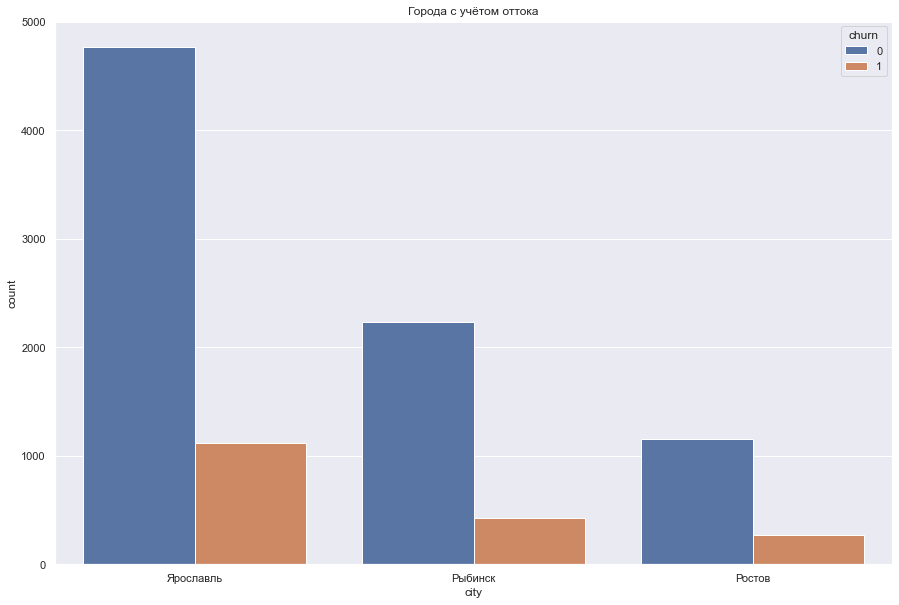

In [98]:
sns.countplot(x='city', hue='churn', data=df, order=df['city'].value_counts().index)
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Города с учётом оттока')

plt.show()

Как видим, примерно одинаковвая пропорция оттока клиентом по разным регионам.

### 3.2 Оценим остатки на балансе для действующих и бывших клиентов.

In [114]:
gender_df = df.groupby(['churn'])\
.agg({'balance':'sum'})\
.reset_index()

gender_df

,churn,balance
0,0,4.324554e+09
1,1,2.040129e+09


Остатки на счетах действующих клиентов превышают более, чем в 2 раза.

### 3.3 Обратим внимание на средний возраст мужчин и женщин, которые сформировали отток.

In [121]:
df.pivot_table(index='gender', values='age', aggfunc='mean')

,age
gender,
Ж,45.589429
М,40.124199


### 3.4 Построим матрицу корреляции показателей.

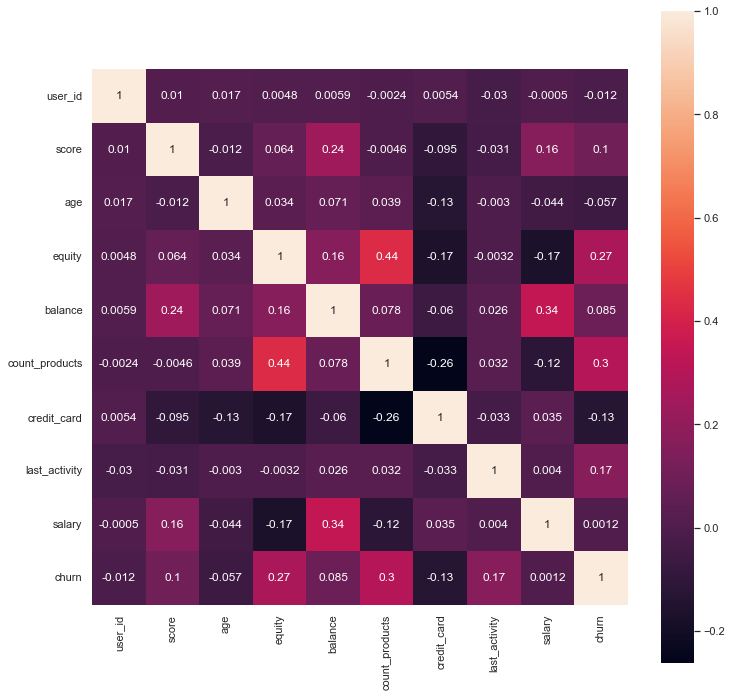

In [117]:
df_corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, square=True)

plt.show()

Сильная корреляция между:  
1) Кредитными картами и количеством продуктов.  
2) Колисетвом предметов залога и количеством продуктов.  
3) Зарплатой и балансом.  
4) Предметами залога и оттоком.

### 3.5 Создадим категории по возрасту и оценим среди каких категорий больше отток

In [46]:
df['age'].unique()

array([25, 37, 30, 51, 34, 56, 39, 38, 54, 67, 52, 41, 31, 28, 35, 42, 45,
       53, 40, 43, 47, 48, 61, 62, 36, 26, 27, 60, 72, 50, 46, 55, 58, 71,
       73, 44, 49, 33, 32, 66, 29, 68, 69, 59, 21, 65, 57, 63, 80, 70, 77,
       64, 20, 18, 19, 78, 74, 76, 22, 75, 23, 81, 24, 83, 82, 84, 79, 86])

In [47]:
def age_category(age):
    if age >= 18 and age <= 30:
        return '18-30'
    if age >= 31 and age <= 45:
        return '31-45'
    if age >= 46 and age <= 65:
        return '46-65'
    if age > 65:
        return '> 65'
    
df['age_category'] = df['age'].apply(age_category)

df.head()

,user_id,score,city,gender,age,equity,balance,count_products,credit_card,last_activity,salary,churn,age_category
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,18-30
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,31-45
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,18-30
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,46-65
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,31-45


In [48]:
df.pivot_table(
    index=['age_category', 'churn']\
    , values='user_id', aggfunc='count'
    )

user_id
age_category churn         
18-30        0         1050
             1          307
31-45        0         4233
             1          875
46-65        0         2413
             1          629
> 65         0          481
             1           10

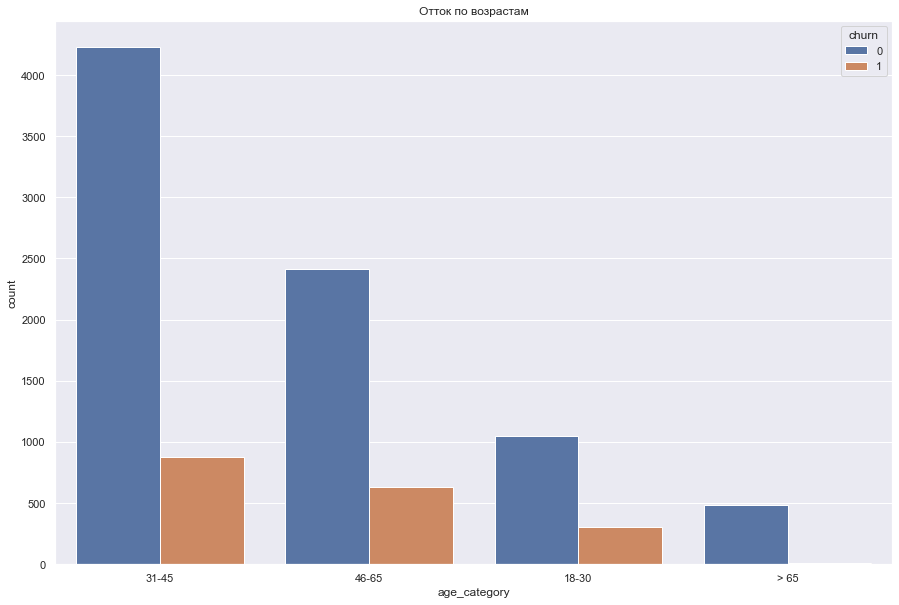

In [49]:
sns.countplot(x='age_category', hue='churn', data=df, order=df['age_category'].value_counts().index)
sns.set(rc={'figure.figsize':(12,8)})
plt.title('Отток по возрастам')

plt.show()

Самыми верными клиентами оказались люди старше 65 лет, а чаще покидали банк напротив - самая молодая возрастная категория.

## 4. Сегментация клиентов

### 4.1 Узнаем долю  клиентов в разбивке по количеству продуктов 

In [101]:
df['count_products'].unique()

array([2, 3, 1, 4])

In [102]:
df.groupby('count_products')\
.agg({'user_id':'nunique'})

,user_id
count_products,
1,3327
2,5096
3,1046
4,474


Исключим из дальнейшего анализа клиента с нулём продуктов и с 5 продуктами. Можем считать выбросом 31 клиента из 10 000.

In [103]:
df = df.query('count_products != 0 & count_products != 5')
df['count_products'].unique()

array([2, 3, 1, 4])

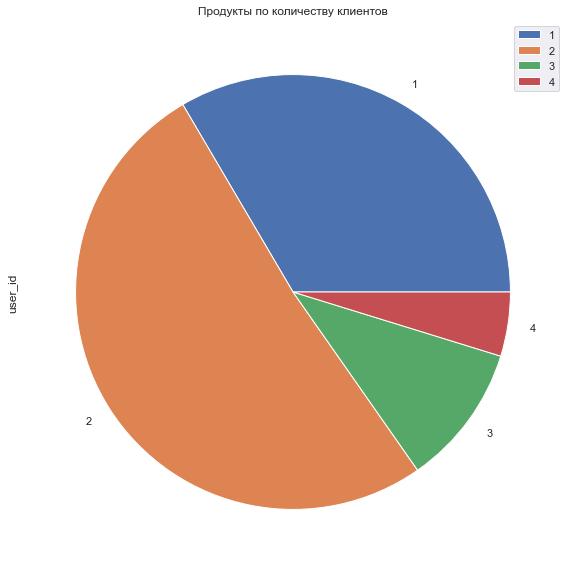

In [104]:
fig1 = df.groupby('count_products')\
.agg({'user_id':'nunique'})\
.plot(kind='pie',  subplots=True, figsize=(10,10))
plt.title('Продукты по количеству клиентов')

plt.show()

Большинство клиентом пользуется 2-мя продуктами банка и совсем немногие обзавелись 5-ю.

### 4.2 Оценим какой отток клиентов по каждому числу продуктов

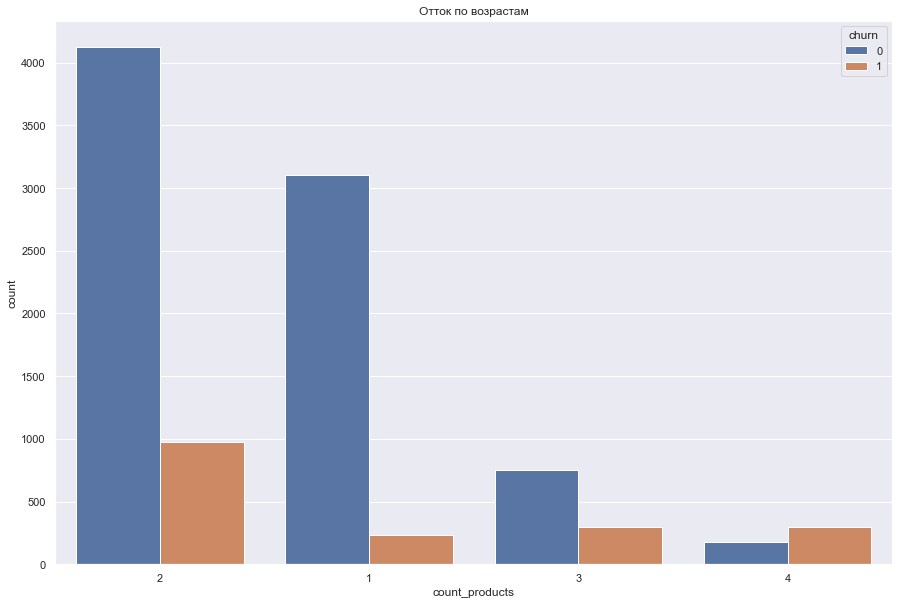

In [105]:
sns.countplot(x='count_products', hue='churn', data=df, order=df['count_products'].value_counts().index)
sns.set(rc={'figure.figsize':(12,8)})
plt.title('Отток по возрастам')

plt.show()

### 4.3 Разделим пользователей по сегментам

In [108]:
df.pivot_table(index=['count_products','churn'], values='user_id', aggfunc='count', columns=['gender'])

gender                   Ж     М
count_products churn            
1              0      1469  1636
               1        64   171
2              0      2324  1805
               1       342   637
3              0       472   276
               1       127   171
4              0        78    96
               1       100   200

Среди мужчин явно больше покинувших банк.

In [123]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'count_products', 'credit_card', 'last_activity', 'salary', 'churn',
       'age_category'],
      dtype='object')

In [137]:
df.groupby('count_products').agg({'credit_card':'count', 'churn':'mean'}).reset_index()

,count_products,credit_card,churn
0,1,3340,0.070359
1,2,5108,0.191660
2,3,1046,0.284895
3,4,474,0.632911


Разделим по количеству продуктов на 4 группы в зависимости от их количества.

## 5. Статистические гипотезы

### 5.1 Определим стат критерий. Сформируем нулевую и альтернативную гипотезу №1

Уровень статистической сзначимости установим на уровне 5%. 

Нулевая гипотеза: зарплата клиентов с одним и двумя продуктами одинаковая.  
Альтернативная гипотеза: зарплата клиентов с одним и двумя продуктами разная.

In [95]:
alpha = .05
results = st.stats.ttest_ind(
    df[df['count_products']==2]['salary'], df[df['count_products']==1]['salary']
    )
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.4573512522390504e-57
Отвергаем нулевую гипотезу


### 5.1 Определим стат критерий. Сформируем нулевую и альтернативную гипотезу №2

Уровень статистической сзначимости установим на уровне 5%. 

Нулевая гипотеза: количество объектов собственности клиентов с мужского и женского пола одинаковое.  
Альтернативная гипотеза: количество объектов собственности клиентов с мужского и женского пола одинаковый разное.

In [96]:
alpha = .05
results = st.stats.ttest_ind(
    df[df['gender']=='М']['equity'], df[df['gender']=='Ж']['equity']
    )
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.02786067621769642
Отвергаем нулевую гипотезу


## 6. Сформулируем выводы и реккомендации в разрезе сегментов.